Импортируем все необходиые библиотеки

In [3]:
import pandas as pd # для чтения таблиц
import matplotlib.pyplot as plt # для построения графиков
from sklearn.neighbors import KNeighborsClassifier as KNC

Считываем тренировочную и тестовую выборку. Тренировочная выборка (train) по смыслу --- та, на который мы будем обучать классификатор. Для неё алгоритм видит и матрицу объекты-признаки и метки (ответы, labels). Другая часть --- тестовая выборка (test). На ней мы будем тестировать, насколько наш алгоритм хорош. Для неё мы будем показывать алгоритму только матрицу объекты-признаки и предсказывать с помощью обученного алгоритма метки, а затем сравнивать их с настоящими, которые мы не показывали алгоритму, таким образом замеряя качество.  

Чтобы запустить следующую ячейку, рядом с вашей тетрадкой должны лежать файлы "mnist_train.csv" и "mnist_test.csv", которые можно скачать с https://pjreddie.com/projects/mnist-in-csv/.

In [4]:
train_set = pd.read_csv("mnist_train.csv")
test_set = pd.read_csv("mnist_test.csv")

Создаем объект класса KNC (KNeighborsClassifier), т.е. алгоритма машинного обучения к ближайших соседей. Гиперпараметр (параметры, которые мы задаем до начала обучения у алгоритмов машинного обучения принято называть гиперпараметрами) n_neighbors равен числу соседей, метки которых бы будем проверять при предсказаниях, n_jobs --- число ядер вашего компьютера, которые будут использованы при вычислении предсказаний.

In [5]:
knc = KNC(n_neighbors=5, n_jobs=2)

Обучаем классификатор. Обучения традиционно происходит с помощью вызова метода .fit(). В первый аргумент подаём тренировочную матрицу объекты-признаки, во второй --- ответы для тренировочных данных.

In [6]:
knc.fit(train_set.values[:, 1:], train_set.values[:, 0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=5, p=2,
           weights='uniform')

Теперь давайте выведем 10 картинок вместе с предсказанными и истинными значениями меток для тестового датасета (его наш алгоритм ещё не видел, он их не запоминает)

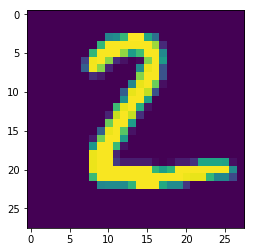

[2]
2


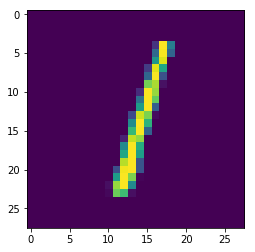

[1]
1


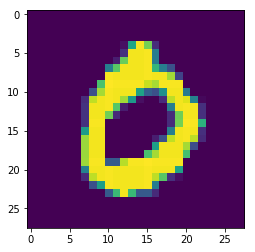

[0]
0


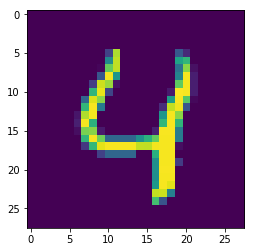

[4]
4


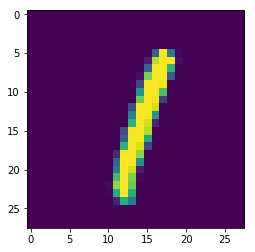

[1]
1


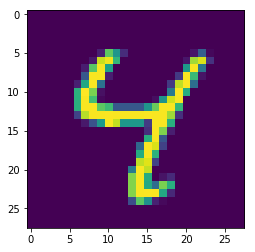

[4]
4


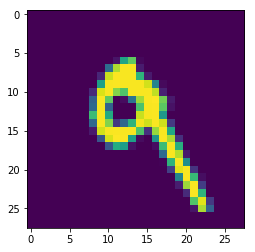

[9]
9


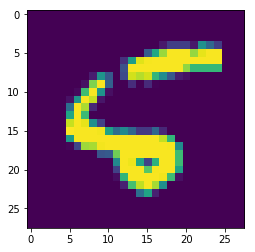

[5]
5


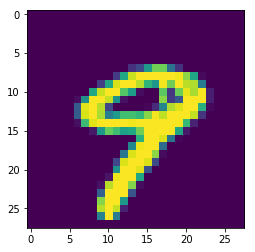

[9]
9


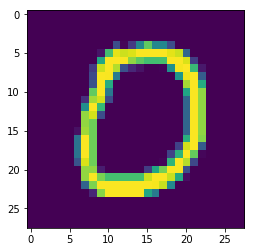

[0]
0


In [7]:
for i in range(10):
    plt.imshow(test_set.values[i, 1:].reshape(28, 28)) # imshow нужно подавать квадратную матрицу, 
                                                        # чтобы он мог воспринять её как картинку,
                                                        # для этого мы делаем reshape(). Также можно было
                                                        # вызвать reshape(28, -1), это то же самое.
    plt.show() # говорим ipython отрисовать всё, что было заготовлено
    print(knc.predict(test_set.values[i, 1:].reshape(1, -1))) # предсказываем метку с помощью KNC для i-ой картинки и
                                                                # выводим её
    print(test_set.values[i, 0]) # выводим истинную метку

## Задание. 
Напишите код, который бы выяснял качество наших предсказаний, т. е. считал бы отношение числа верно угаданных меток картинок к общему числу. Понятно, что тестироваться нужно не на одной картинке, но на скольки?